In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import torch
from torch import optim, nn
from math import exp

import numpy as np

from tqdm import tqdm
from random import randint

from load_dataset import load_dataset, plot_image, save_image
from auto_encoder2 import PAutoE

device = "cuda"

pimages = load_dataset().to(device)

In [2]:
T = 50
beta = torch.linspace(1e-4, 0.3, T, device=device)

alpha = 1 - beta

alpha_ = torch.zeros(T, device=device)

for i in range(T):
    alpha_[i] = torch.prod(alpha[0:i+1])

alpha_

tensor([9.9990e-01, 9.9368e-01, 9.8142e-01, 9.6330e-01, 9.3962e-01, 9.1077e-01,
        8.7723e-01, 8.3956e-01, 7.9837e-01, 7.5431e-01, 7.0807e-01, 6.6033e-01,
        6.1177e-01, 5.6303e-01, 5.1473e-01, 4.6742e-01, 4.2160e-01, 3.7769e-01,
        3.3605e-01, 2.9694e-01, 2.6056e-01, 2.2704e-01, 1.9645e-01, 1.6878e-01,
        1.4397e-01, 1.2192e-01, 1.0251e-01, 8.5560e-02, 7.0889e-02, 5.8300e-02,
        4.7589e-02, 3.8555e-02, 3.1000e-02, 2.4736e-02, 1.9586e-02, 1.5389e-02,
        1.1996e-02, 9.2785e-03, 7.1196e-03, 5.4195e-03, 4.0922e-03, 3.0649e-03,
        2.2767e-03, 1.6773e-03, 1.2255e-03, 8.8782e-04, 6.3777e-04, 4.5425e-04,
        3.2075e-04, 2.2453e-04], device='cuda:0')

In [3]:
torch.sqrt(1 - alpha_[-1])

tensor(0.9999, device='cuda:0')

In [4]:
torch.sqrt(1-alpha_[49])

tensor(0.9999, device='cuda:0')

In [6]:
torch.sqrt(alpha_[-1])

tensor(0.0150, device='cuda:0')

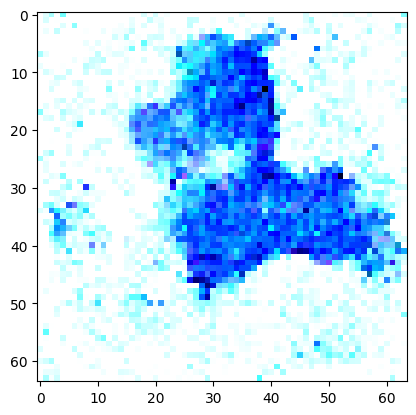

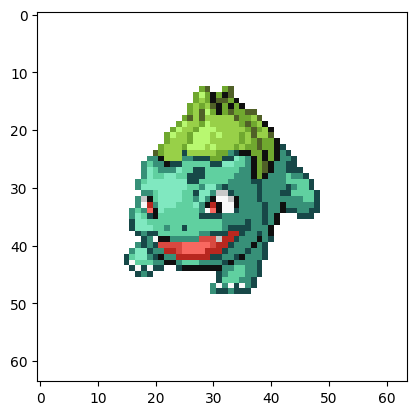

In [17]:
from IPython.display import clear_output

pkm = 0
tt = 40

z = torch.randn((3,64,64), device=device)
x = torch.sqrt(alpha_[tt-1]) * pimages[0][pkm] + torch.sqrt(1-alpha_[tt-1]) * z

plot_image(x)

for t in reversed(range(tt)):

    model = torch.jit.load(f"./model_{t}.pt").eval().to(device)

    z = torch.randn((3,64,64), device=device) 
    e = model(x[None])[0] * (1 - alpha[t]) / torch.sqrt(1 - alpha_[t])

    x = (1 / torch.sqrt(alpha[t])) * (x - e) + z * torch.sqrt(beta[t])
    
    clear_output(wait=True)
    plot_image(x)
    
plot_image(pimages[0][pkm])

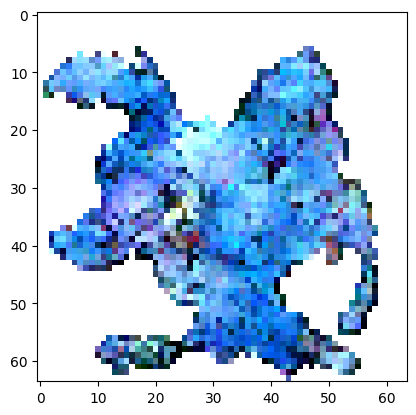

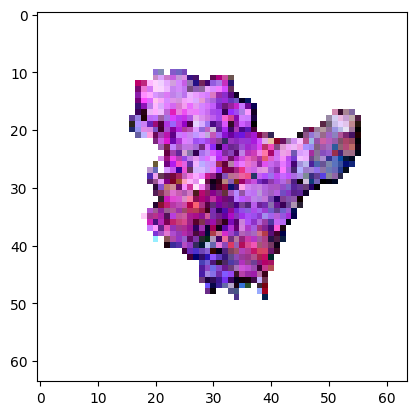

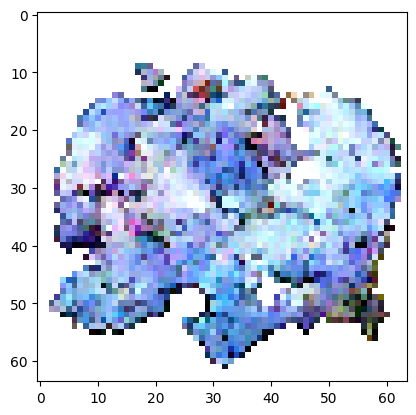

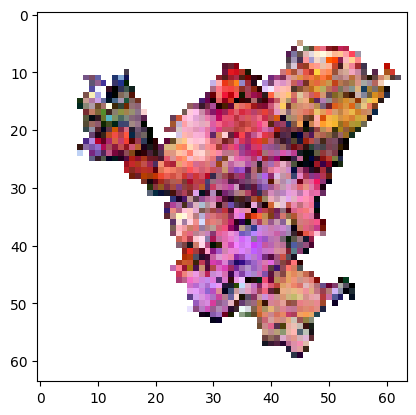

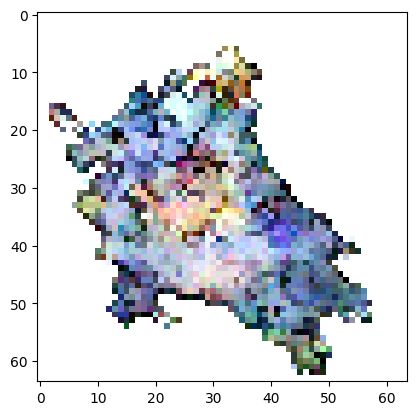

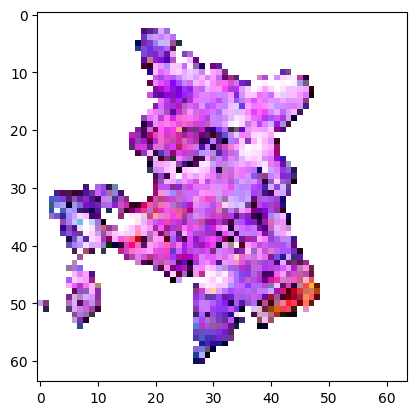

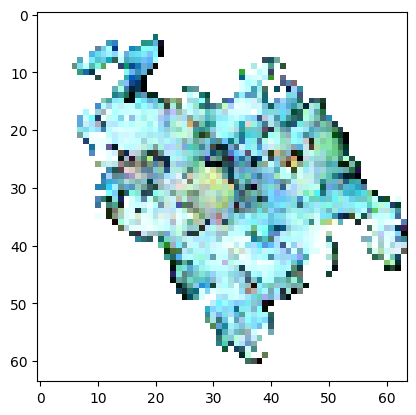

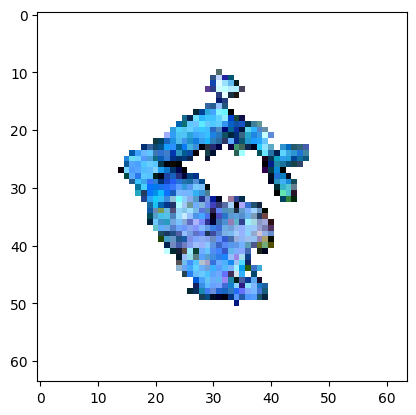

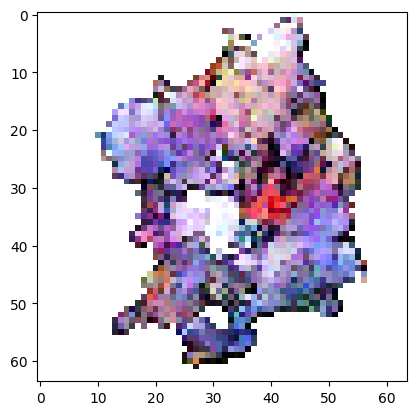

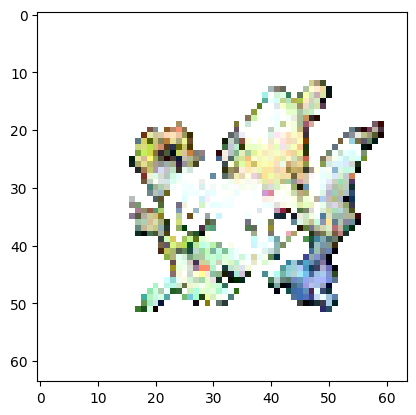

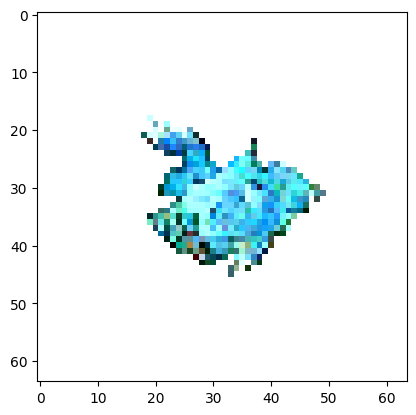

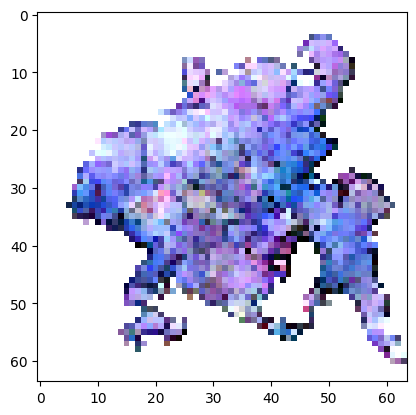

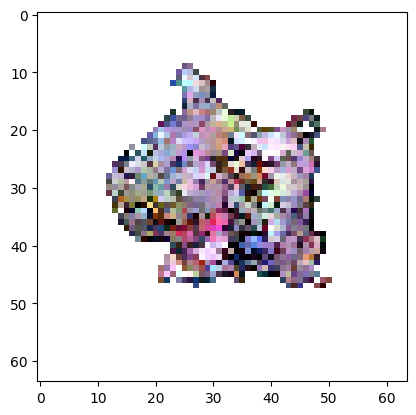

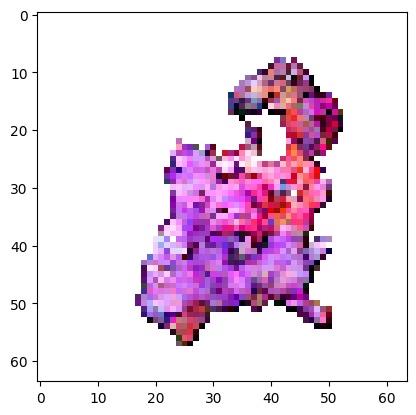

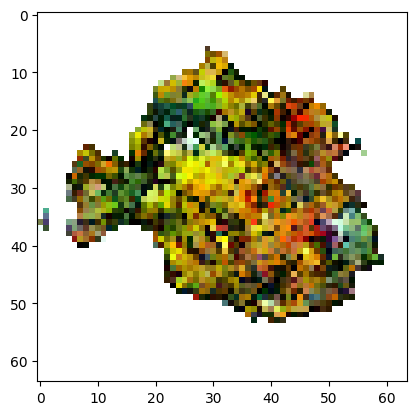

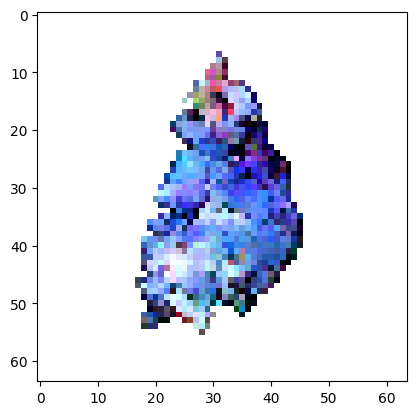

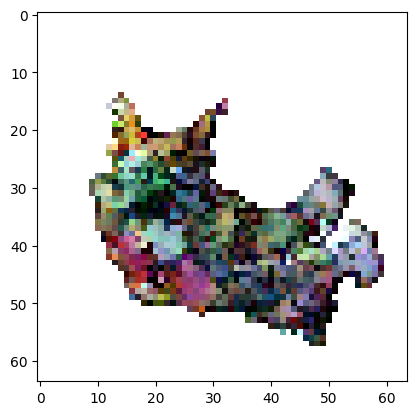

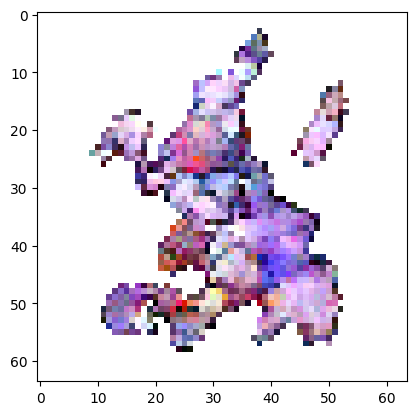

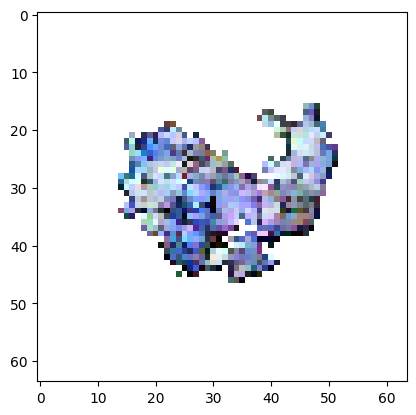

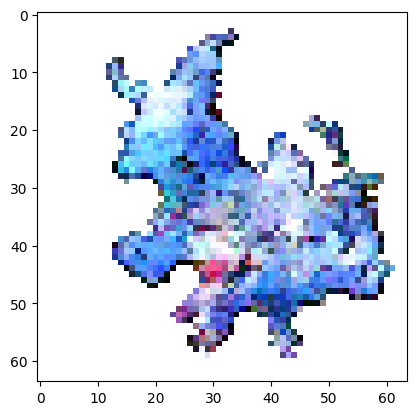

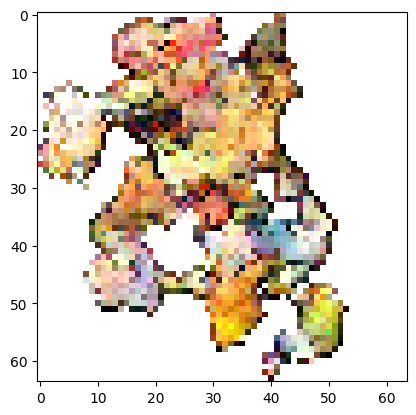

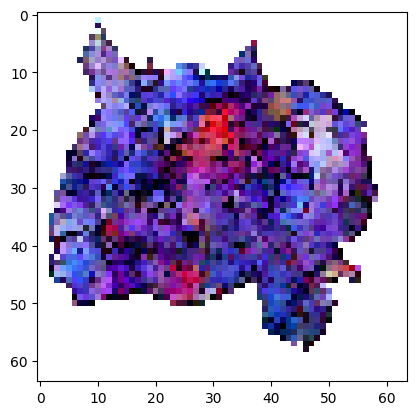

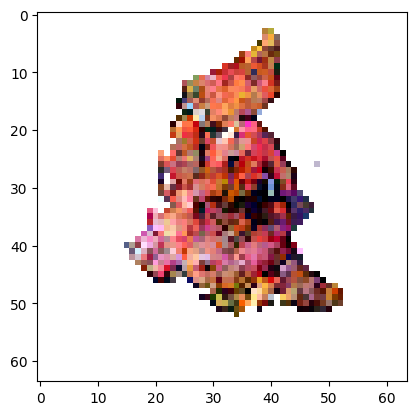

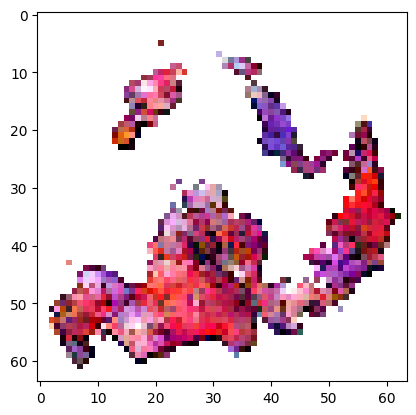

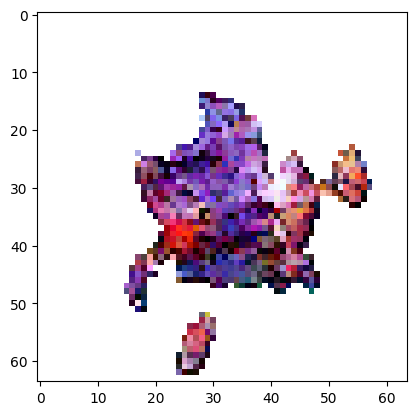

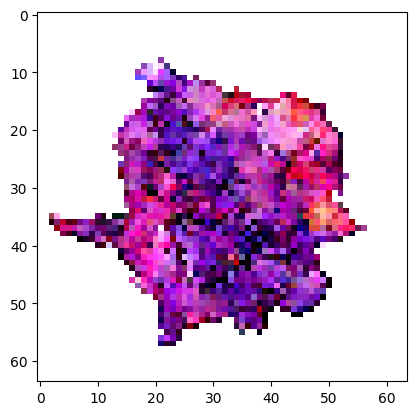

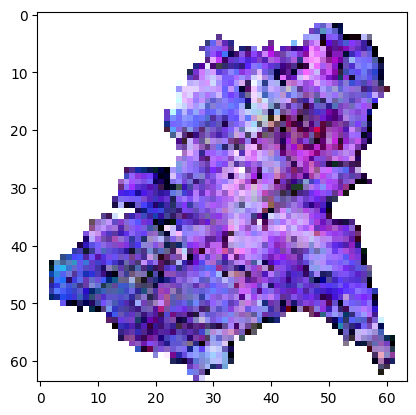

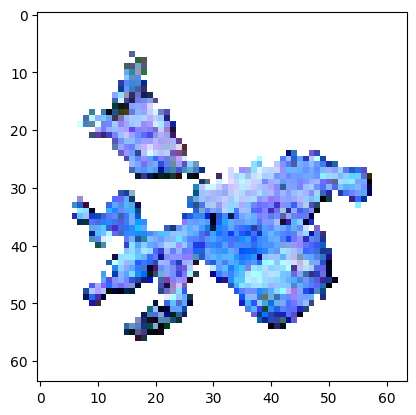

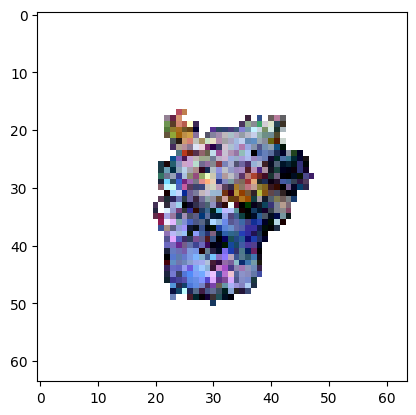

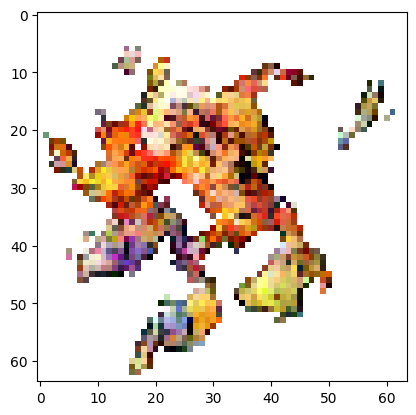

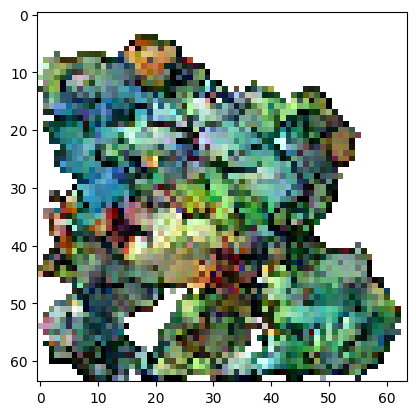

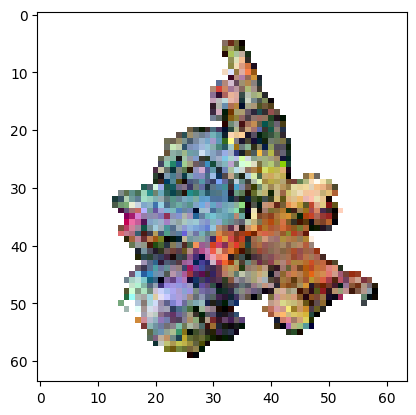

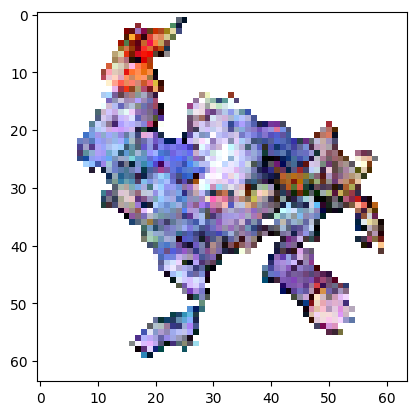

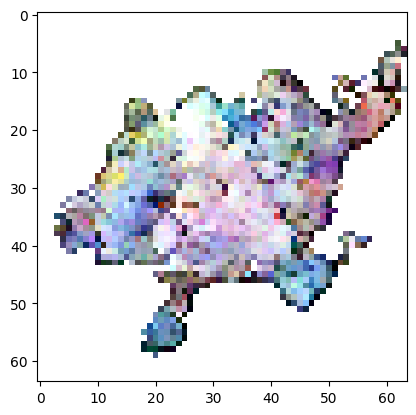

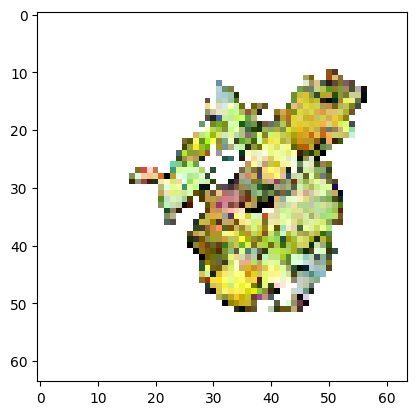

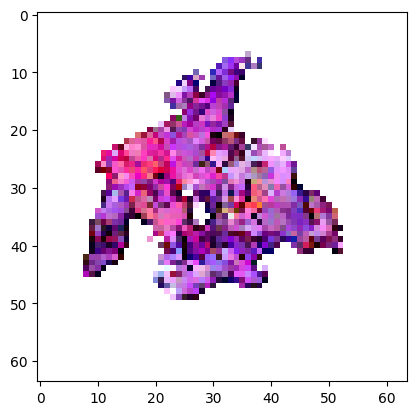

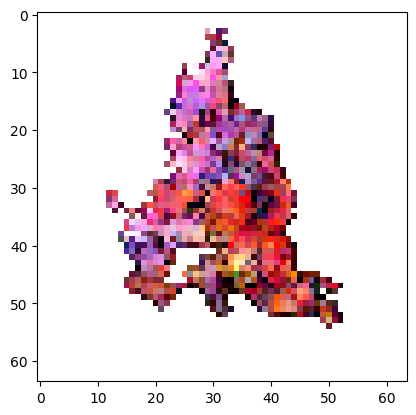

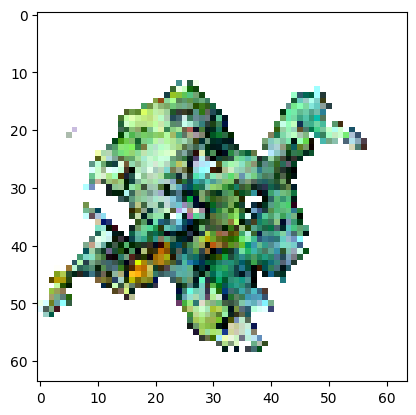

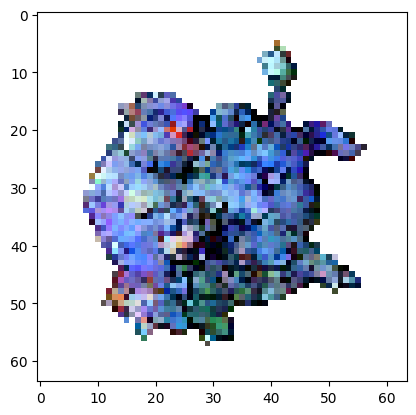

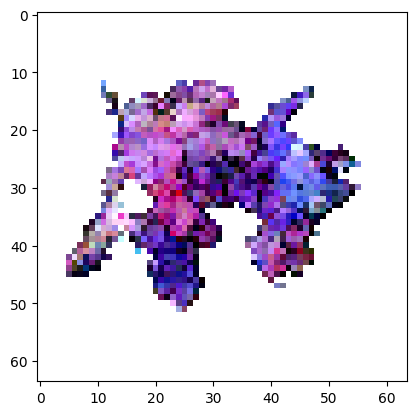

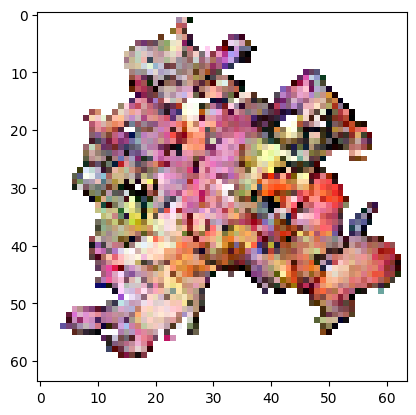

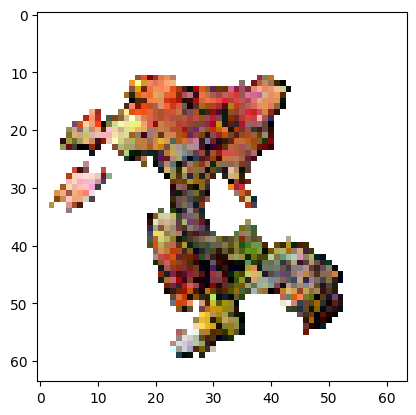

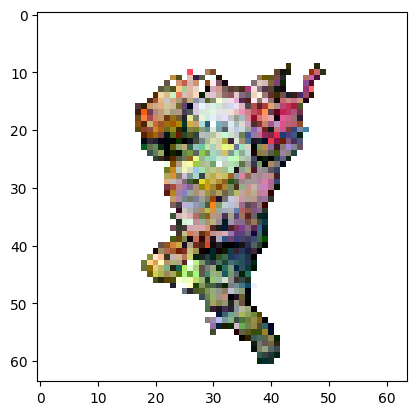

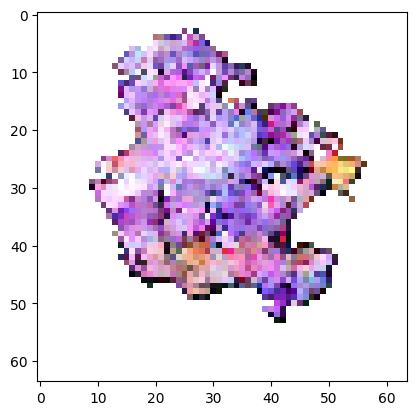

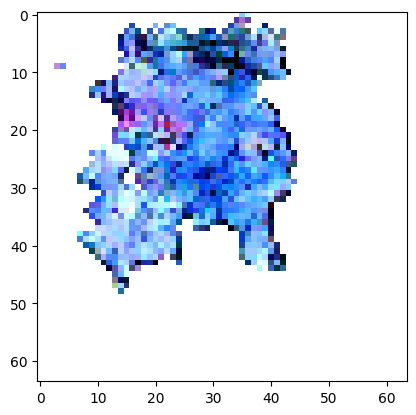

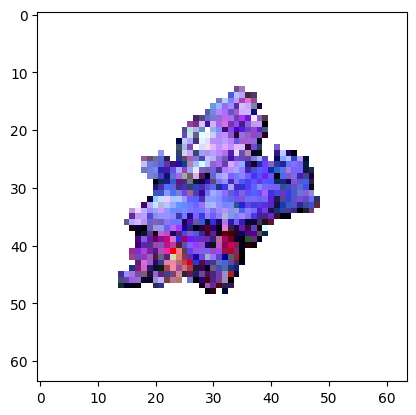

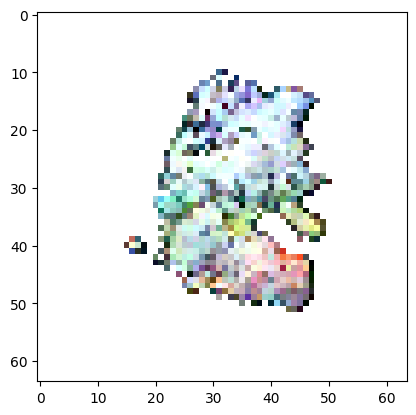

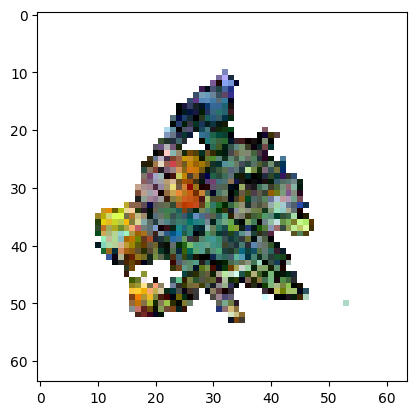

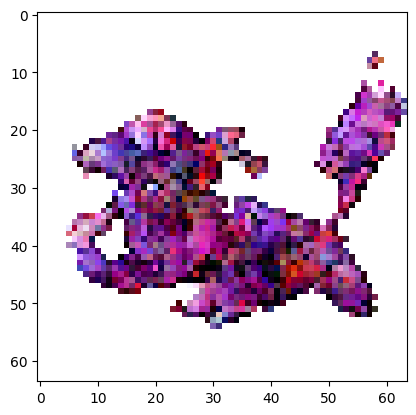

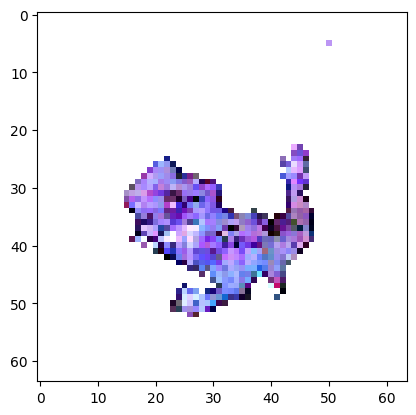

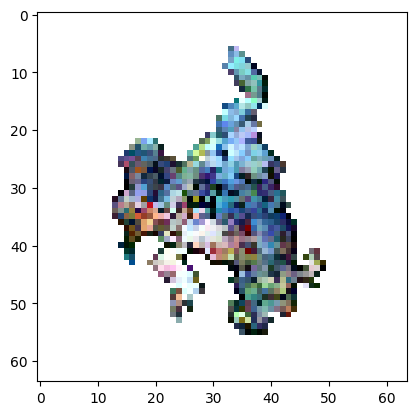

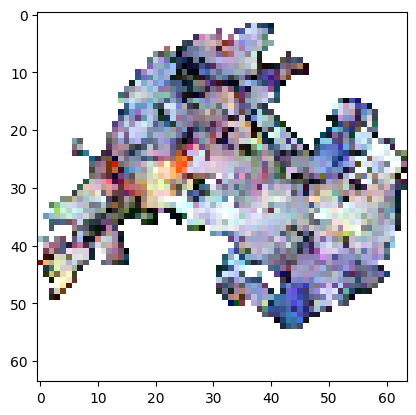

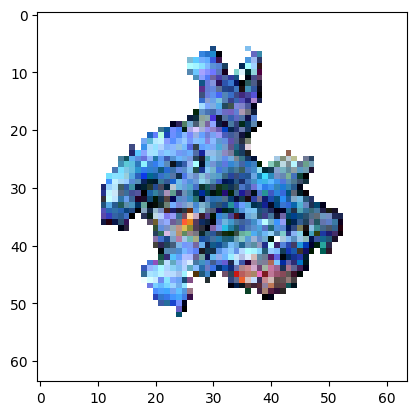

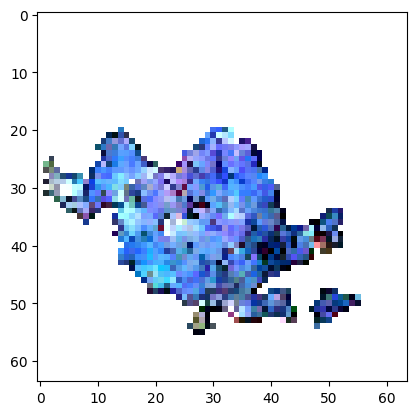

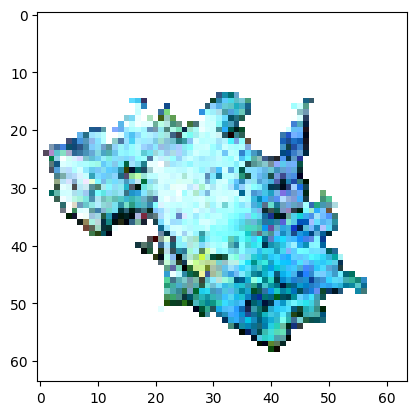

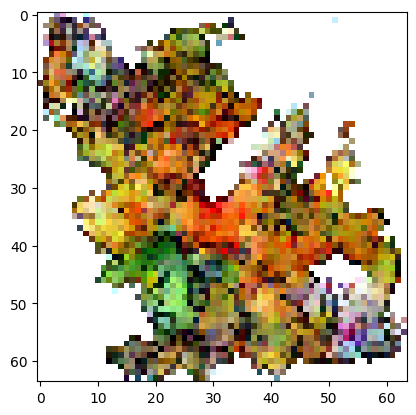

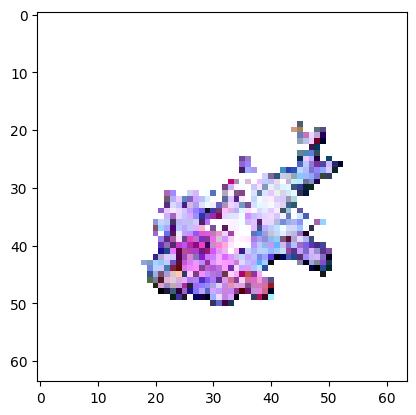

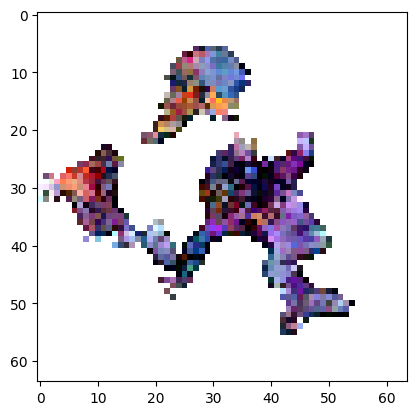

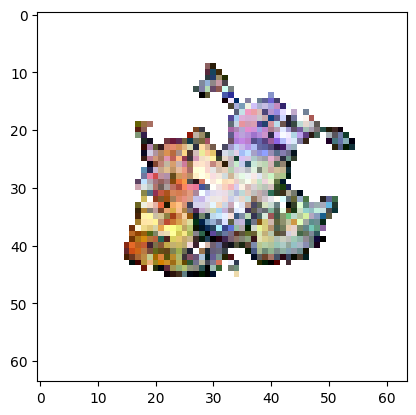

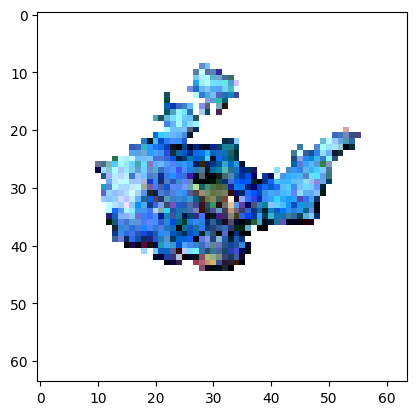

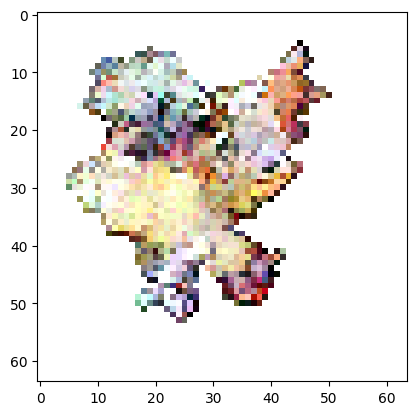

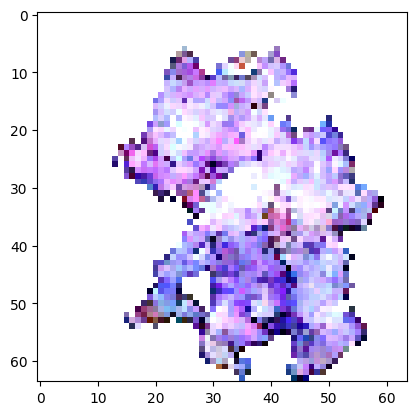

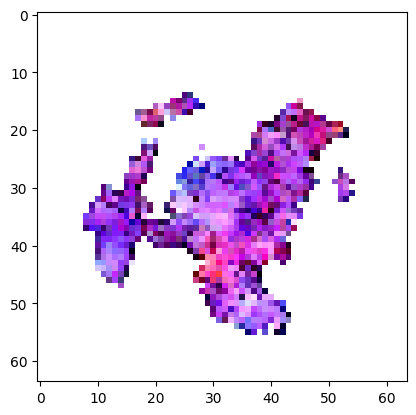

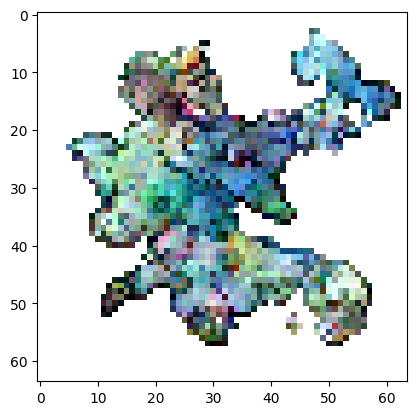

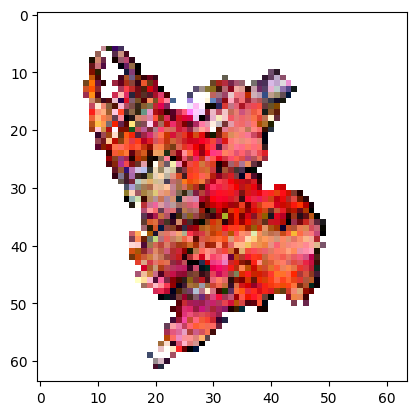

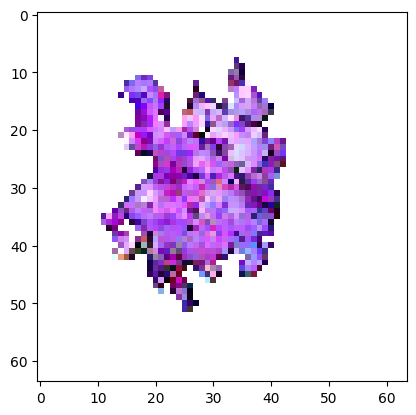

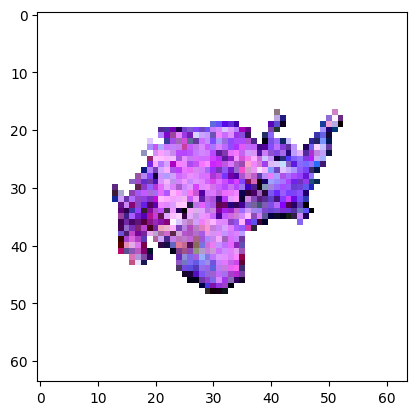

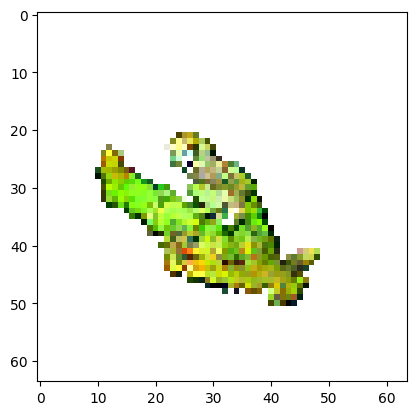

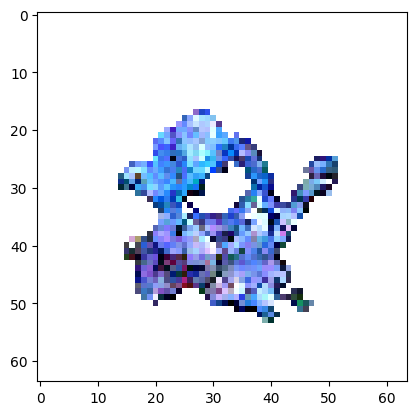

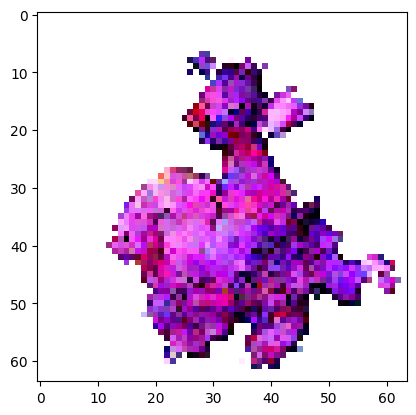

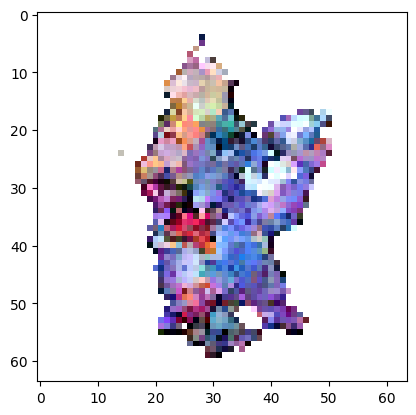

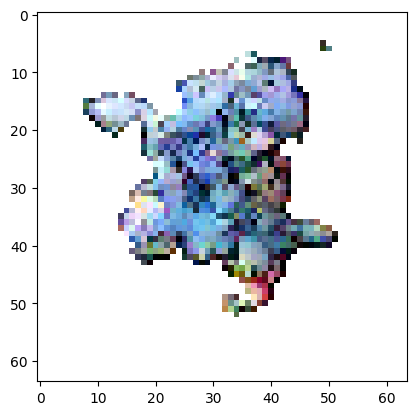

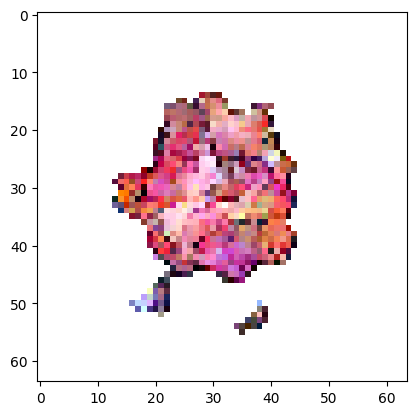

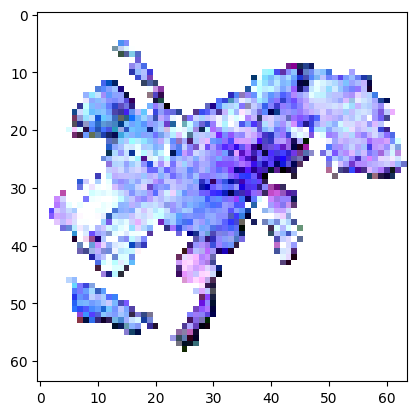

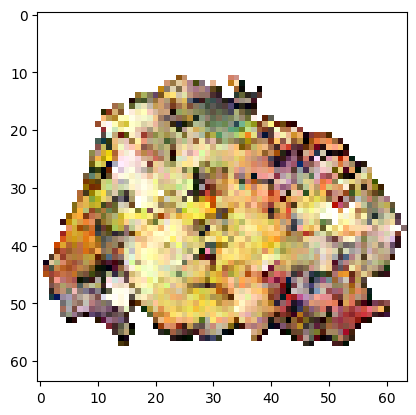

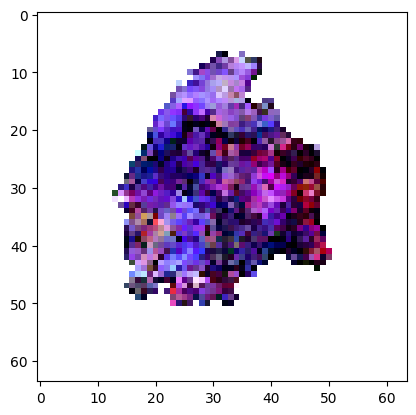

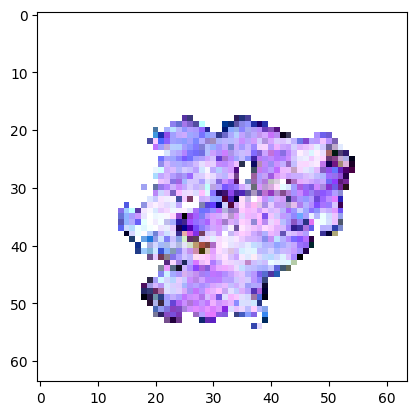

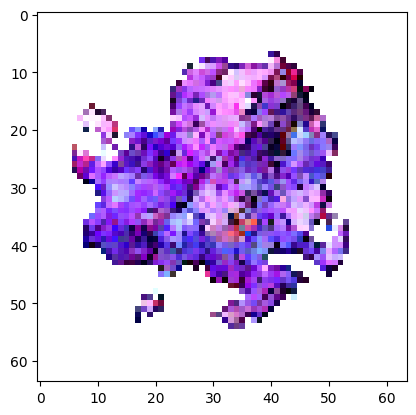

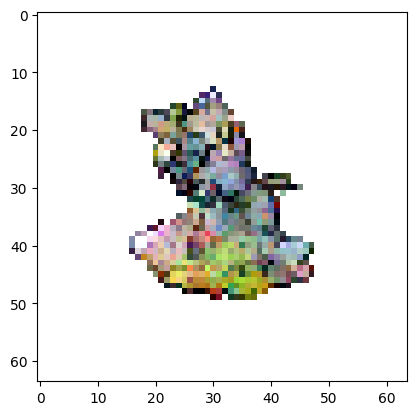

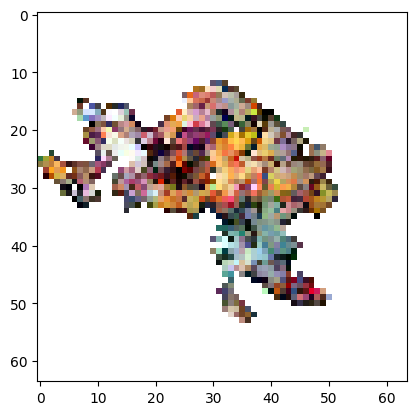

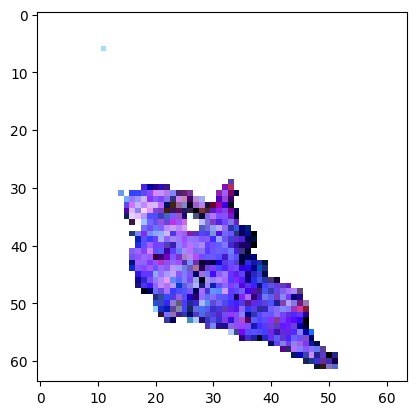

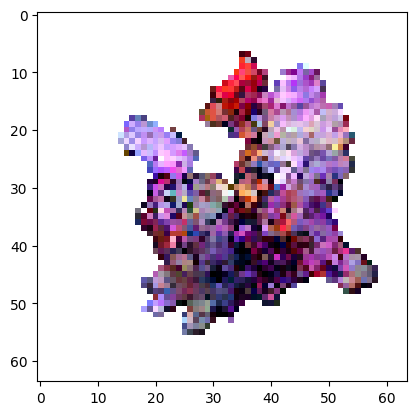

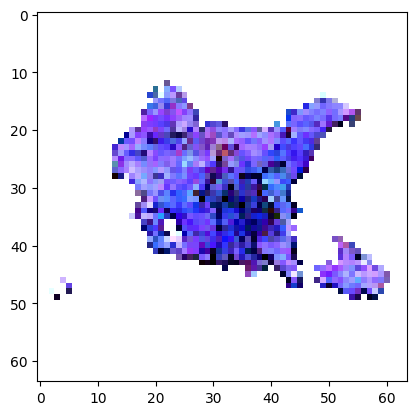

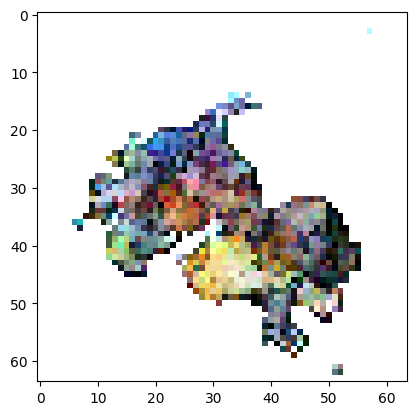

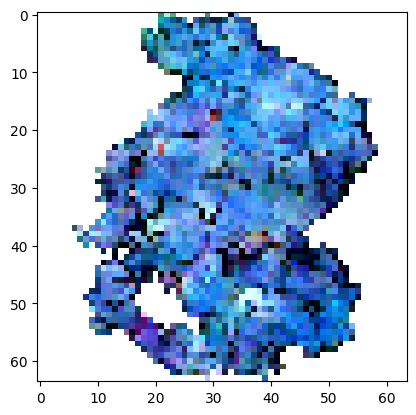

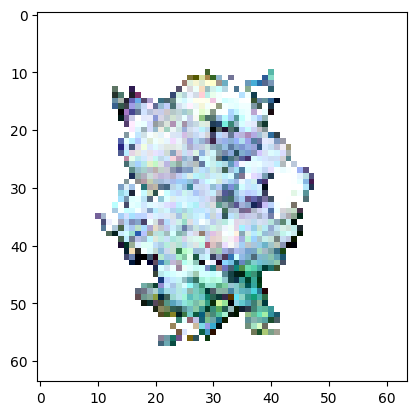

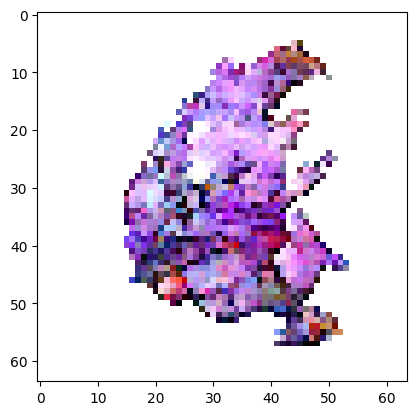

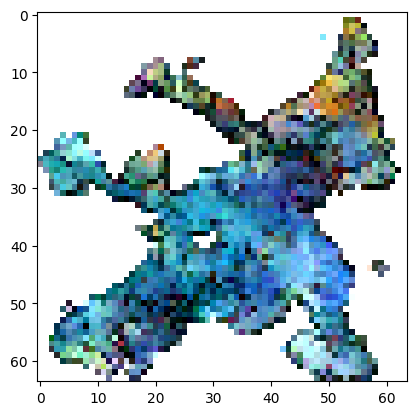

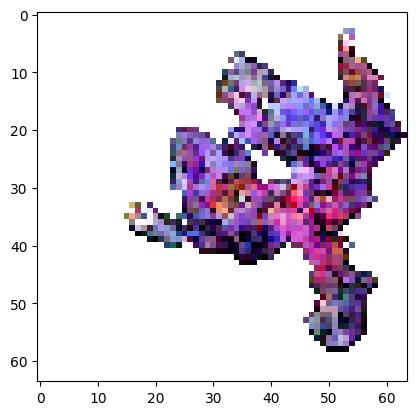

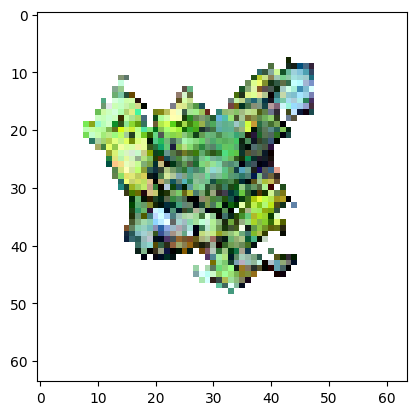

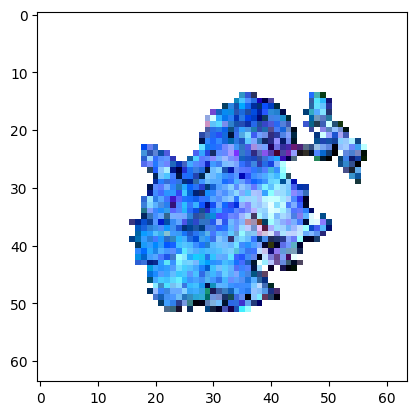

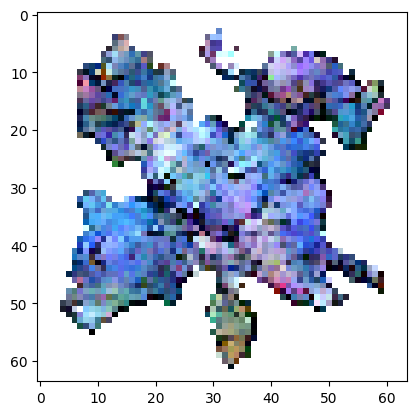

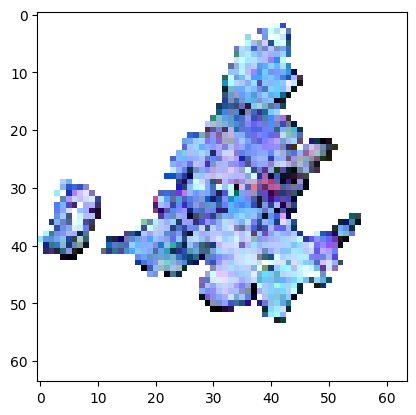

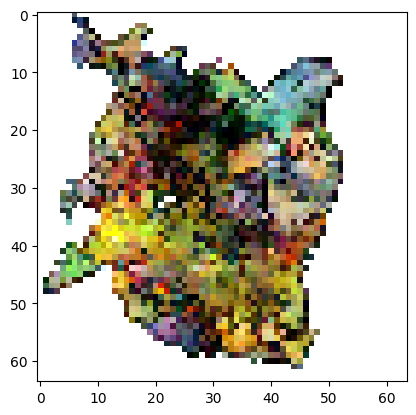

In [ ]:
for i in range(100):

    pkm = randint(0, 280)
    tt = 40

    z = torch.randn((3,64,64), device=device)
    x = torch.sqrt(alpha_[tt-1]) * pimages[0][pkm] + torch.sqrt(1-alpha_[tt-1]) * z

    for t in reversed(range(tt)):

        model = torch.jit.load(f"./model_{t}.pt").eval().to(device)

        z = torch.randn((3,64,64), device=device) 
        e = model(x[None])[0] * (1 - alpha[t]) / torch.sqrt(1 - alpha_[t])

        x = (1 / torch.sqrt(alpha[t])) * (x - e) + z * torch.sqrt(beta[t])

    save_image(x, f"tests/test18/{i}.png")
    plot_image(x)